<a href="https://colab.research.google.com/github/ramubalu/myfiles/blob/master/WCP2_DIAMOND_LNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dataset**

In [0]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/pracasrv/machine-learning-getting-started-ws/master/data/diamonds.csv',index_col=0)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


**Understanding the dataset**

In [59]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [60]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Data Description as provided by the Data Provider**

A data frame with 53940 rows and 10 variables:

price price in US dollars (\$326--\$18,823)
carat weight of the diamond (0.2--5.01)
cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
color diamond colour, from J (worst) to D (best)
clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x length in mm (0--10.74)
y width in mm (0--58.9)
z depth in mm (0--31.8)
depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
table width of top of diamond relative to widest point (43--95)

**Handling Outliers and Erroneous Values**

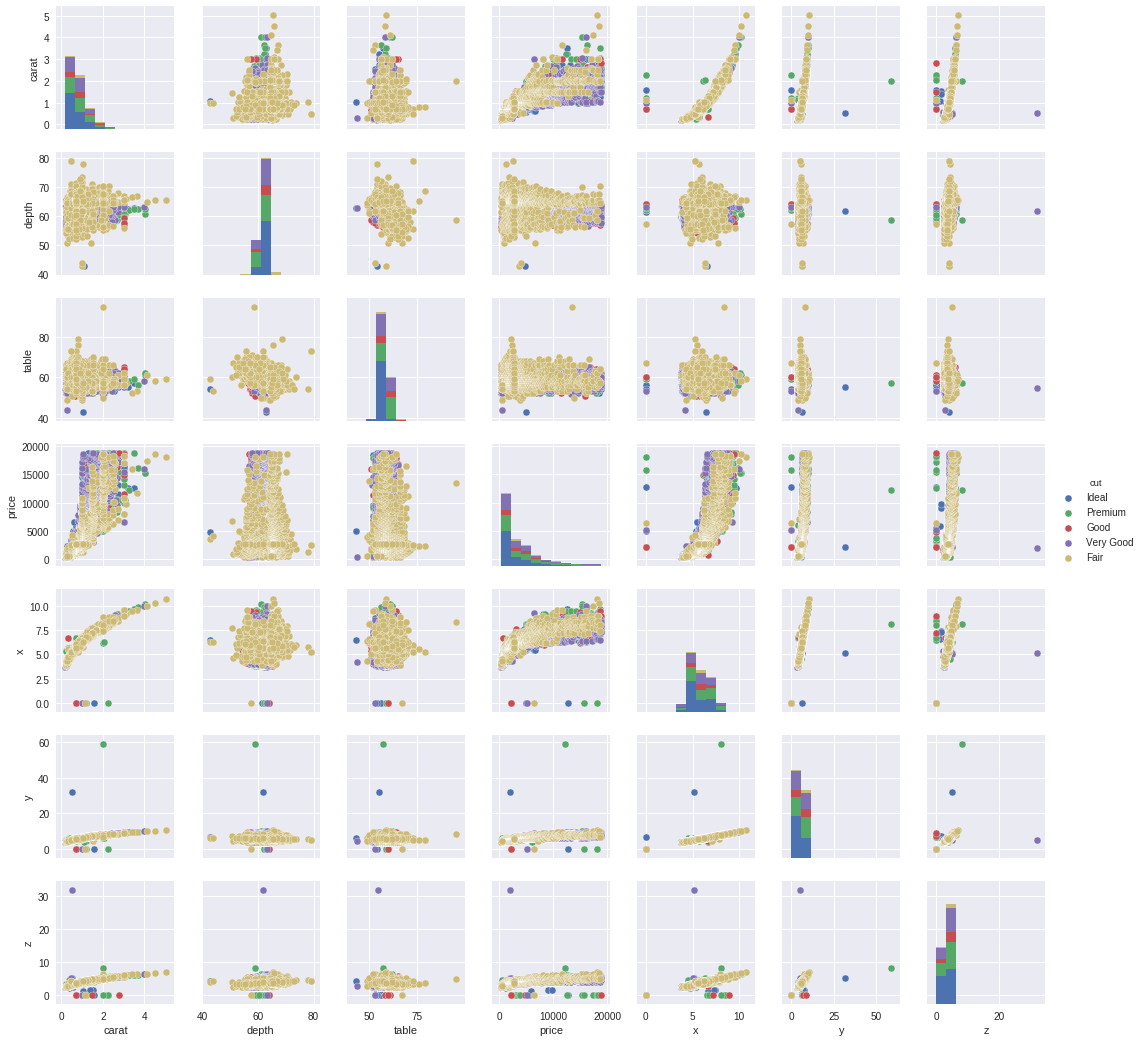

In [61]:
import seaborn as sns
sns.pairplot(data,size=2.1,hue='cut');

In [62]:
data.query('x==0 | y==0 | z==0 | depth==0 | table==0 | carat==0')

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [0]:
data=data.drop(data.query('x==0 | y==0 | z==0 | depth==0 | table==0 | carat==0').index)

In [64]:
data.query('table >80')

,carat,cut,color,clarity,depth,table,price,x,y,z
24933,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


In [0]:
data=data.drop(data.query('table>80').index)

In [67]:
data.query('y>20')

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


In [0]:
data = data.drop(data.index[data.y > 20],axis = 0)

In [69]:
data.query('z>10')

,carat,cut,color,clarity,depth,table,price,x,y,z
48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [0]:
data = data.drop(data.index[data.z > 10],axis = 0)

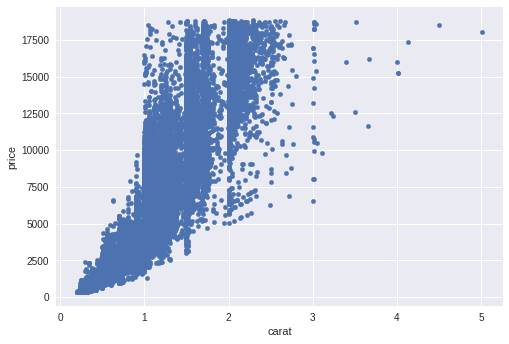

In [127]:
data.plot.scatter(x='carat', y='price');

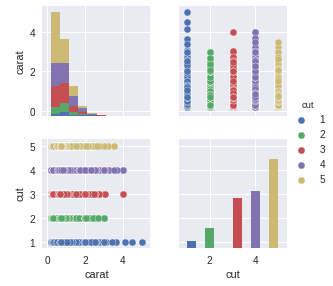

In [114]:
sns.pairplot(data[data.columns[0:2]],size=2.1,hue='cut');

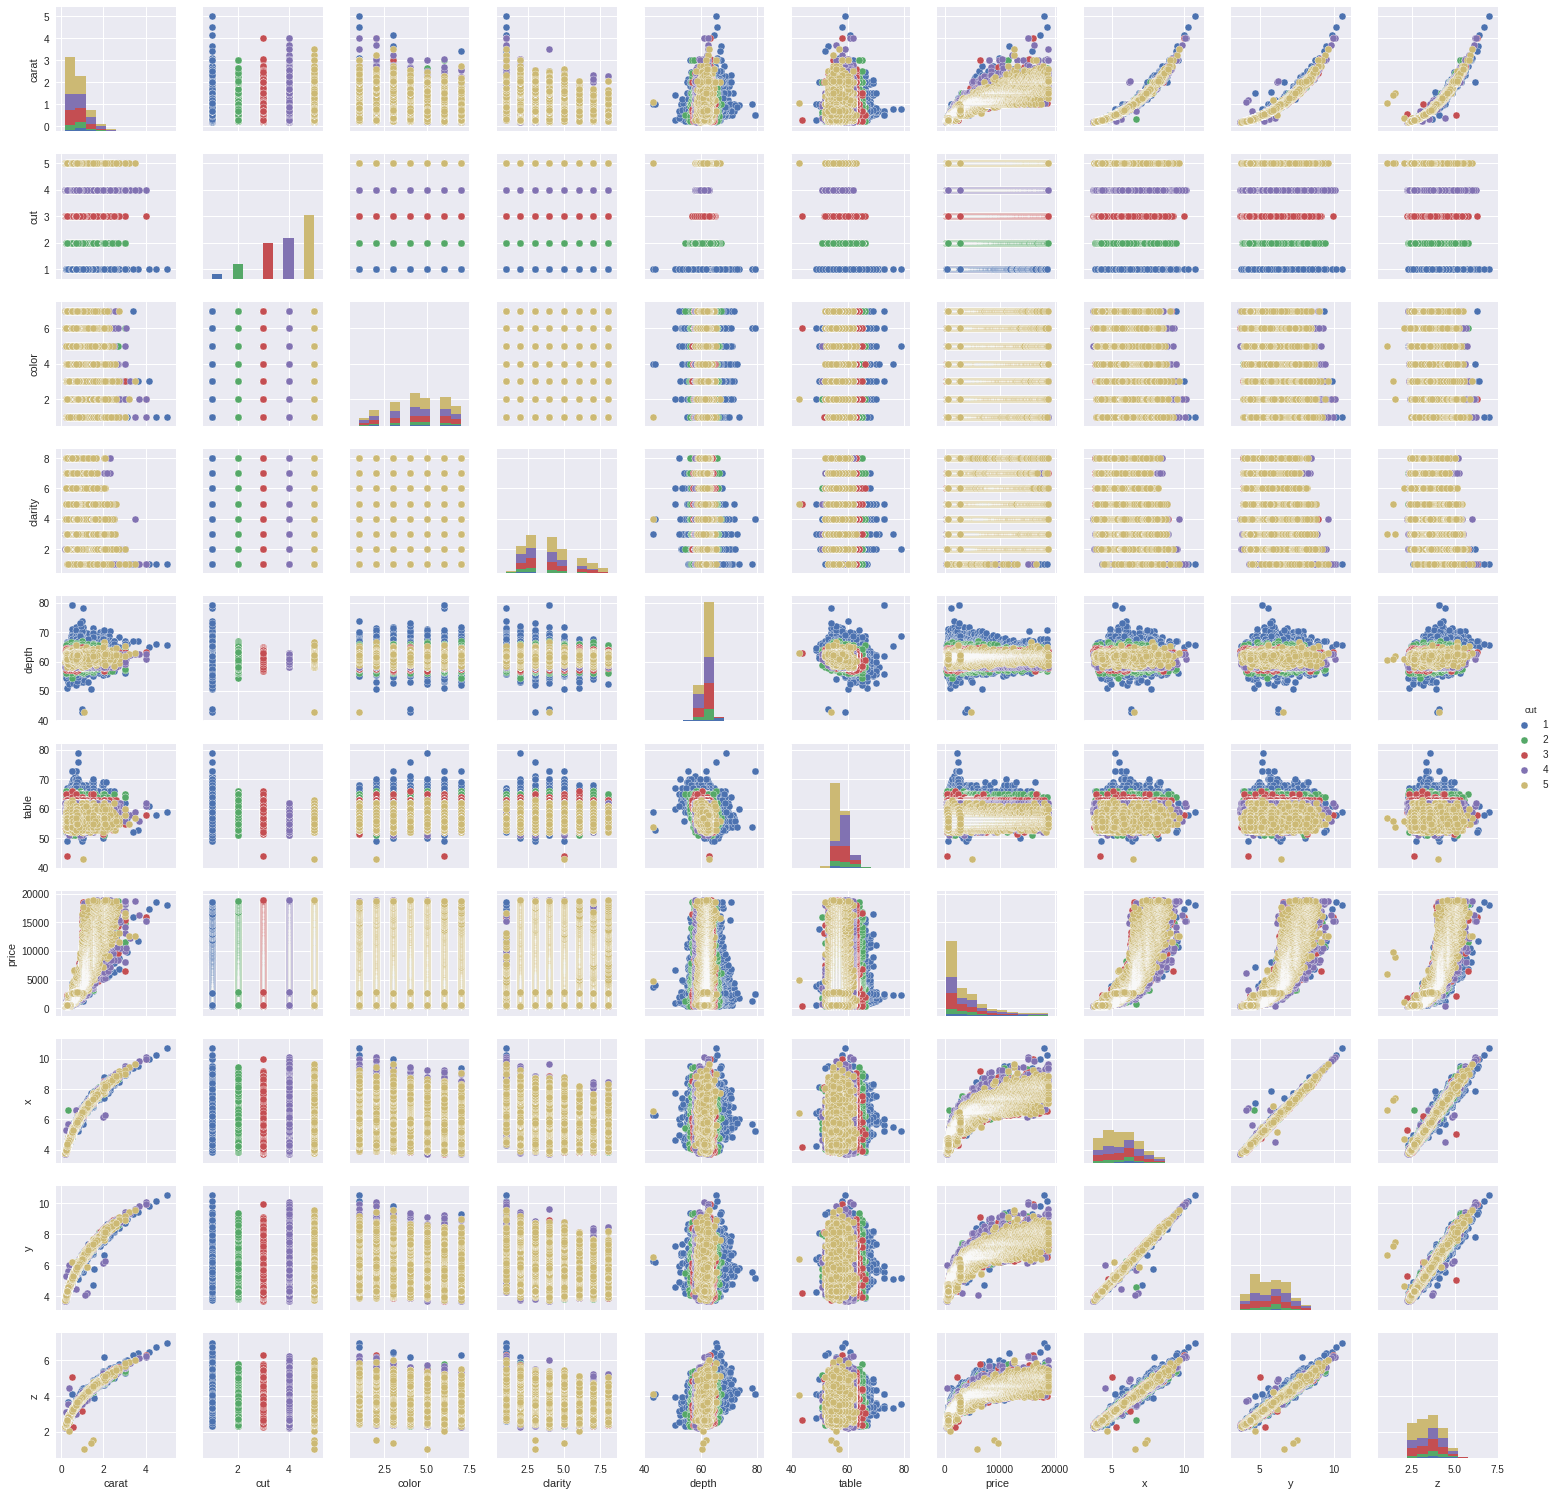

In [124]:
sns.pairplot(data,size=2.1,hue='cut');

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53916 entries, 1 to 53940
Data columns (total 10 columns):
carat      53916 non-null float64
cut        53916 non-null object
color      53916 non-null object
clarity    53916 non-null object
depth      53916 non-null float64
table      53916 non-null float64
price      53916 non-null int64
x          53916 non-null float64
y          53916 non-null float64
z          53916 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [72]:
data.describe()

,carat,depth,table,price,x,y,z
count,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000
mean,0.797664,61.749623,57.456243,3930.735088,5.731557,5.733381,3.539384
std,0.473753,1.432267,2.228231,3987.043996,1.119357,1.111227,0.691603
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,79.000000,18823.000000,10.740000,10.540000,6.980000


**Handling Categorical Variables**

In [0]:
cc = {'cut':{'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5},
                         'color':{'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1},
                         'clarity':{'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}
                         }
data.replace(cc, inplace=True)

In [74]:
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
7,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47
8,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53
9,0.22,1,6,4,65.1,61.0,337,3.87,3.78,2.49
10,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39


**Splitting data into train and test**

In [81]:
#X=data[[0,1,2,3,4,5,7,8,9]]
#X.head()
data1=data
data1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [113]:
data.columns['']

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [0]:
X=data1.drop(['price'],axis=1)

In [94]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
1,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75


In [0]:
y=data[['price']]

In [96]:
y.head()

,price
1,326
2,326
3,327
4,334
5,335


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.3,random_state=0)

In [101]:
print("X training data shape: {}".format(Xtr.shape))
print("y training data shape: {}".format(ytr.shape))
print("X test data shape: {}".format(Xte.shape))
print("y test data shape: {}".format(yte.shape))

X training data shape: (37741, 9)
y training data shape: (37741, 1)
X test data shape: (16175, 9)
y test data shape: (16175, 1)


**Applying the Model**

In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [104]:
reg.fit(Xtr,ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
reg.coef_

array([[10843.14427592,   124.03552467,   321.47873919,   490.93577055,
           92.2295224 ,   -21.46731667, -1629.02009843,  2531.76819177,
        -2910.46040111]])

In [0]:
ypred=reg.predict(Xte)

In [107]:
print(ypred)

[[ 724.4338943 ]
 [-612.62881171]
 [4063.34859611]
 ...
 [ 192.76672805]
 [5429.7417425 ]
 [5694.43731168]]


In [110]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(yte, ypred)
print(mse)
rms = sqrt(mean_squared_error(yte, ypred))
print(rms)
from sklearn.metrics import r2_score
print(r2_score(yte, ypred))

1451520.0213238474
1204.7904470586773
0.9076237046963341


In [117]:
yte['pred']=ypred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
yte['diff']=yte['price']-yte['pred']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
yte.head()

,price,pred,diff
36629,478,724.433894,-246.433894
43956,516,-612.628812,1128.628812
6687,4101,4063.348596,37.651404
52102,2459,2703.065332,-244.065332
35153,890,1526.145142,-636.145142


**Notes**

**For drop rows, columns reference**

df.dropna()
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)
df.drop(['a', 'b', 'c'], axis=1)
df.drop(['a'], axis=1)
df.drop([rn1,rn2],axis=0)

ix is deprecated in favour of iloc and loc